# PyNGL Example

## Import numpy and PyNGL

In [1]:
import numpy as np
import Ngl

### Create a list

In [2]:
#Create one list, no missing values.
y = [ 0.,  0.71,  1.,  0.7,  0.002, -0.71, -1., -0.71, -0.003]

# Create a masked array, based on the list, and add some
# missing values.
ymsg    = np.array(y)

print ymsg
#ymsg[2] = ymsg.fill_value()
#ymsg[5] = ymsg.fill_value()
#ymsg[6] = ymsg.fill_value()

[ 0.     0.71   1.     0.7    0.002 -0.71  -1.    -0.71  -0.003]


### Define workstation

In [3]:
wks_type = "png"
img_name = "xymsg"
wks = Ngl.open_wks(wks_type, img_name)


### Generate a quick plot

In [4]:
res = Ngl.Resources()

# First plot doesn't have missing values.
res.tiMainString = "No missing values, no gaps"
res.trYMaxF      =  1.2
res.trYMinF      = -1.2
plot = Ngl.y(wks,y,res)

### We can view the generated png file with PIL

In [5]:
#from PIL import ImageTk, Image

filename = img_name + "." + wks_type
#imgobj = Image.open(filename)
#imgobj.load()
#print "imgobj", imgobj
#print "Show imgobj: ", filename
#imgobj.show()

### Make matplotlib plot inline

In [6]:
%matplotlib inline

### Now view the plot

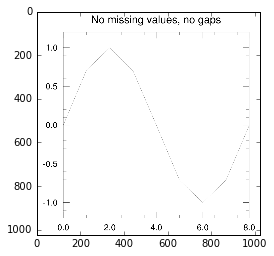

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread(filename)
imgplot = plt.imshow(img)

### Draw second plot

In [8]:
# Second plot uses a masked array that contains missing values.
# Note that technically, a masked array that doesn't have a
# corresponding "mask" array doesn't recognize *any* of its
# values as being missing. However, in Ngl, we do. Don't know
# if this is a good way to do things, but it makes it simpler
# for the user.
res.tiMainString = "Three missing values, two gaps"
res.nglFrame     = False
res.nglDraw      = False
plot = Ngl.y(wks,ymsg,res)

# Add some markers showing the original points.
mkres               = Ngl.Resources()
mkres.gsMarkerIndex = 16
mkres.gsMarkerColor = "red"
marker = Ngl.add_polymarker(wks,plot,range(0,len(y)),y,mkres)

Ngl.draw(plot)

### Forwad the frame

In [9]:
Ngl.frame(wks)

### Display the plot

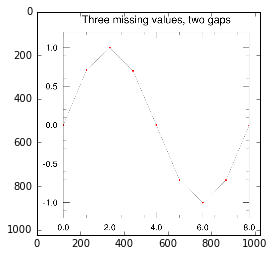

In [10]:
filename = img_name + ".000002." + wks_type
img=mpimg.imread(filename)
imgplot = plt.imshow(img)

### End PyNGL

In [11]:
Ngl.end()